In [41]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Data Collection and Pre Processing

In [42]:
#Ignore warning messages
warnings.filterwarnings('ignore')

In [43]:
# loading the csv data to a Pandas DataFrame
tb_data = pd.read_csv('D:\\machine learning\\tuberculosis.csv')


In [44]:
tb_data.head()

,No,gender,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph Nodes,loss of appetite,outcome
0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,Yes
1,2,0,1,0,1,1,1,0,1,0,1,0,0,1,1,Yes
2,3,1,0,0,0,1,1,1,1,0,0,0,1,0,1,Yes
3,4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,No
4,5,0,0,0,0,1,0,0,1,0,1,0,0,1,0,No


In [45]:
# number of rows and columns in the dataset
tb_data.shape

(1000, 16)

In [46]:
# getting some info about the data
tb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   No                                                         1000 non-null   int64 
 1   gender                                                     1000 non-null   int64 
 2   fever for two weeks                                        1000 non-null   int64 
 3   coughing blood                                             1000 non-null   int64 
 4   sputum mixed with blood                                    1000 non-null   int64 
 5   night sweats                                               1000 non-null   int64 
 6   chest pain                                                 1000 non-null   int64 
 7   back pain in certain parts                                 1000 non-null   int64 
 8   shortness of breath

In [47]:
#Encode Object into int64
le = LabelEncoder()

In [48]:
le_tb_data = tb_data
le_tb_data.outcome = le.fit_transform(le_tb_data.outcome)
le_tb_data

,No,gender,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph Nodes,loss of appetite,outcome
0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1
1,2,0,1,0,1,1,1,0,1,0,1,0,0,1,1,1
2,3,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1
3,4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0
996,997,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0
997,998,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
998,999,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1


In [49]:

le_tb_data['outcome'].unique()

array([1, 0])

In [50]:
le_tb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   No                                                         1000 non-null   int64
 1   gender                                                     1000 non-null   int64
 2   fever for two weeks                                        1000 non-null   int64
 3   coughing blood                                             1000 non-null   int64
 4   sputum mixed with blood                                    1000 non-null   int64
 5   night sweats                                               1000 non-null   int64
 6   chest pain                                                 1000 non-null   int64
 7   back pain in certain parts                                 1000 non-null   int64
 8   shortness of breath          

In [51]:
# checking for missing values
le_tb_data.isnull().sum()

No                                                           0
gender                                                       0
fever for two weeks                                          0
coughing blood                                               0
sputum mixed with blood                                      0
night sweats                                                 0
chest pain                                                   0
back pain in certain parts                                   0
shortness of breath                                          0
weight loss                                                  0
body feels tired                                             0
lumps that appear around the armpits and neck                0
cough and phlegm continuously for two weeks to four weeks    0
swollen lymph Nodes                                          0
loss of appetite                                             0
outcome                                                

In [52]:
# statistical measures about the data
le_tb_data.describe()

,No,gender,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph Nodes,loss of appetite,outcome
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.515000,0.49000,0.517000,0.513000,0.507000,0.512000,0.497000,0.525000,0.501000,0.507000,0.474000,0.511000,0.488000,0.472000,0.483000
std,288.819436,0.500025,0.50015,0.499961,0.500081,0.500201,0.500106,0.500241,0.499624,0.500249,0.500201,0.499573,0.500129,0.500106,0.499465,0.499961
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,750.250000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1000.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# find duplicate rows
duplicate_row = le_tb_data[le_tb_data.duplicated()]
print("Duplicates: ", duplicate_row.shape)

Duplicates:  (0, 16)


In [54]:
#Drops Column that is not helpful for the analysis
le_tb_data.drop(['No'], axis=1, inplace=True)

In [55]:
le_tb_data.head()

,gender,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph Nodes,loss of appetite,outcome
0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1
1,0,1,0,1,1,1,0,1,0,1,0,0,1,1,1
2,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1
3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [56]:
#Renames the cleaned dataset as the finalDataSet
finalDataset = le_tb_data.reset_index(drop=True)

In [57]:
# checking the distribution of Condition Variable
finalDataset['outcome'].value_counts()

0    517
1    483
Name: outcome, dtype: int64

0 --> The Person does not have Tuberculosis  

1 --> The Person have Tuberculosis  

In [58]:
x_features = finalDataset
x_features = finalDataset.drop(columns='outcome', axis=1)

In [59]:
X = x_features
Y = finalDataset['outcome']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 14) (800, 14) (200, 14)


Model Training

Logistic Regression

In [62]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, Y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Model Evaluation

Accuracy Score

In [63]:
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)

In [64]:
from sklearn. metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       103
           1       0.46      0.41      0.43        97

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200



In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy:', accuracy_score(Y_test, y_pred))
print("Overall Precision:",precision_score(Y_test, y_pred))
print("Overall Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.48
Overall Precision: 0.45977011494252873
Overall Recall: 0.41237113402061853


In [66]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(Y_test, y_pred)
print(mcm)

[[56 47]
 [57 40]]


In [67]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.48


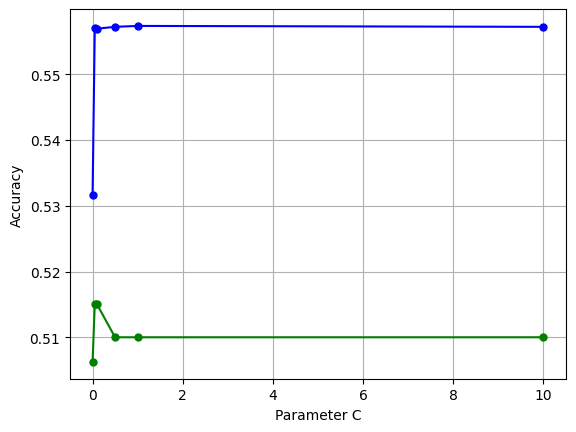

In [68]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
train_scores, test_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=Y_train,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)

# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Building a Predictive System

In [69]:
input_data = (0,0,0,0,1,0,0,0,1,1,1,1,1,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# # reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]== 0):
  print('The Person does not have Tuberculosis')
else:
  print('The Person have Tuberculosis')

[0]
The Person does not have Tuberculosis


# Pickling the model

In [70]:
# Make pickle file of our model
pickle.dump(model, open("tb_model.pkl", "wb"))

In [71]:
load_model = pickle.load(open("tb_model.pkl", "rb"))

In [72]:
accuracy = load_model.score(X_test,Y_test)

In [73]:
print("Accuracy : ",accuracy)

Accuracy :  0.48
